Sub-task 1: Think through what key drivers of churn could be for our client


Sub-task 2: Build the features in order to get ready to model


## 0. Import packages

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import pandas as pd
import seaborn as sns
import datetime
import pickle

## 0. Load data

In [42]:
train_data = pd.read_pickle("../processed_data/train_data.pkl")
history_data = pd.read_pickle("../processed_data/history_data.pkl")

In [45]:
train_data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


## 1. Feature engineering

There are mainly 3 categories:

Feature selection, feature transformation and feature extraction.

#### SME activity

From task 2 we concluded that the model is likely to struggle accurately predicting the SME activity due to the large number of categories and low number of companies belonging to each category. Therefore we will abandon this variable.

#### Sales channel

Sales channel can be a significant factor from the EDA result. We will keep it and transform to dummy variable as its categorical variable.

#### Consumption

We have the consumption data for each of the companies for the year 2015. So we can create new features using the average of the year, the last six months, and the last three months to our model.

In [46]:
mean_year=history_data.groupby(["id"]).mean().reset_index()

In [47]:
mean_6m=history_data[history_data["price_date"] >"2015-06-01"].groupby(["id"]).mean().reset_index()

In [48]:
mean_3m=history_data[history_data["price_date"] >"2015-10-01"].groupby(["id"]).mean().reset_index()

#### Combine them into a single dataframe

In [49]:
mean_year=mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                               "price_p2_var": "mean_year_price_p2_var",
                                               "price_p3_var": "mean_year_price_p3_var",
                                               "price_p1_fix": "mean_year_price_p1_fix",
                                               "price_p2_fix": "mean_year_price_p2_fix",
                                               "price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] =mean_year["mean_year_price_p1_var"] +mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] =mean_year["mean_year_price_p2_var"] +mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] =mean_year["mean_year_price_p3_var"] +mean_year["mean_year_price_p3_fix"]

In [50]:
mean_6m=mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
                                           "price_p2_var": "mean_6m_price_p2_var",
                                           "price_p3_var": "mean_6m_price_p3_var",
                                           "price_p1_fix": "mean_6m_price_p1_fix",
                                           "price_p2_fix": "mean_6m_price_p2_fix",
                                           "price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] =mean_6m["mean_6m_price_p1_var"] +mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] =mean_6m["mean_6m_price_p2_var"] +mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] =mean_6m["mean_6m_price_p3_var"] +mean_6m["mean_6m_price_p3_fix"]

In [51]:
mean_3m=mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
                                           "price_p2_var": "mean_3m_price_p2_var",
                                           "price_p3_var": "mean_3m_price_p3_var",
                                           "price_p1_fix": "mean_3m_price_p1_fix",
                                           "price_p2_fix": "mean_3m_price_p2_fix",
                                           "price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] =mean_3m["mean_3m_price_p1_var"] +mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] =mean_3m["mean_3m_price_p2_var"] +mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] =mean_3m["mean_3m_price_p3_var"] +mean_3m["mean_3m_price_p3_fix"]

Note: Because mean_6m and mean_3m are highly correlated, might not be helpful to the model. So using only mean_year here.

In [52]:
#features = pd.merge(mean_year,mean_6m, on="id")
#features = pd.merge(features,mean_3m, on="id")
features=mean_year

#### Create new variable

tenure = date_end - date_activ

In [53]:
train_data["tenure"] = ((train_data["date_end"]-train_data["date_activ"])/np.timedelta64(1, "Y")).astype(int)

In [56]:
tenure=train_data[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage= (tenure.div(tenure.sum(axis=1), axis=0)*100)

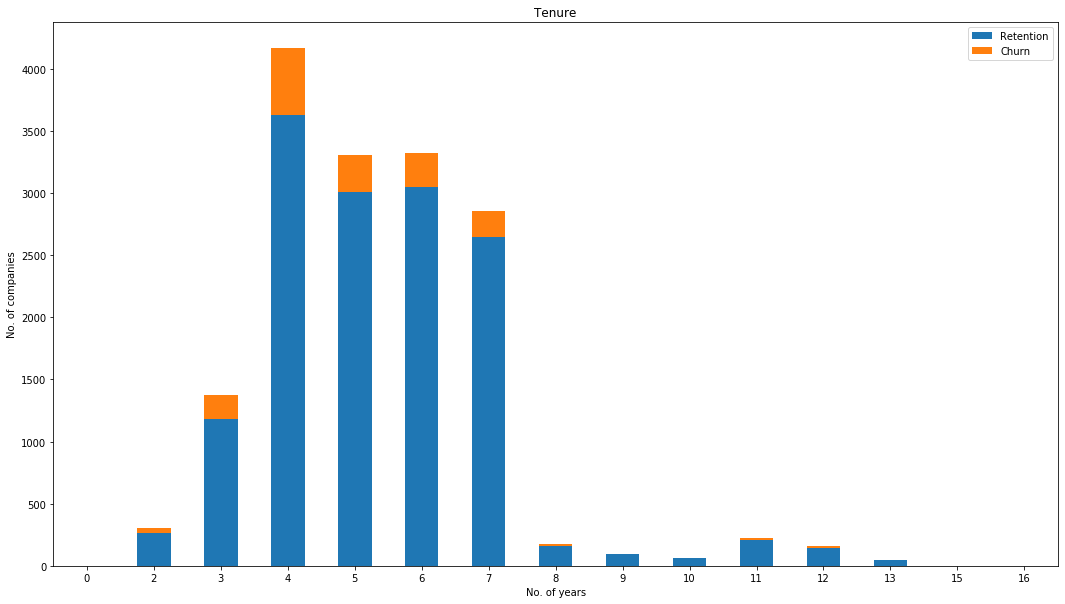

In [57]:
tenure.plot(kind="bar",
            figsize=(18,10),
            stacked=True,
            rot=0,
            title="Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

 churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number ofchurners within the 3-7 years of tenure.

#### Transform some dates

months_activ: Number of months active until reference date (Jan 2016)

months_to_end: Number of months of the contract left at reference date (Jan 2016)

months_modif_prod: Number of months since last modification at reference date (Jan 2016)

months_renewal: Number of months since last renewal at reference date (Jan 2016)

Steps:

1. Substract the reference date and the column date
2. Convert the timedelta in months
3. Convert to integer (we are not interested in having decimal months)

In [61]:
def convert_months(reference_date, dataframe, column):
    """    
    Input a column with timedeltas and return months    
    """
    time_delta=REFERENCE_DATE-dataframe[column]
    months= (time_delta/np.timedelta64(1, "M")).astype(int)
    return months

In [62]:
# Create reference date as provided on the exercise statement
REFERENCE_DATE=datetime.datetime(2016,1,1)

In [65]:
train_data["months_activ"] =convert_months(REFERENCE_DATE, train_data, "date_activ")
train_data["months_to_end"] =-convert_months(REFERENCE_DATE, train_data, "date_end")
train_data["months_modif_prod"] =convert_months(REFERENCE_DATE, train_data, "date_modif_prod")
train_data["months_renewal"] =convert_months(REFERENCE_DATE, train_data, "date_renewal")

In [67]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    """    Plot churn distribution by monthly variable    """
    temp=dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar",
              figsize=(18,10),
              stacked=True,
              rot=0,
              title=column)
    
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

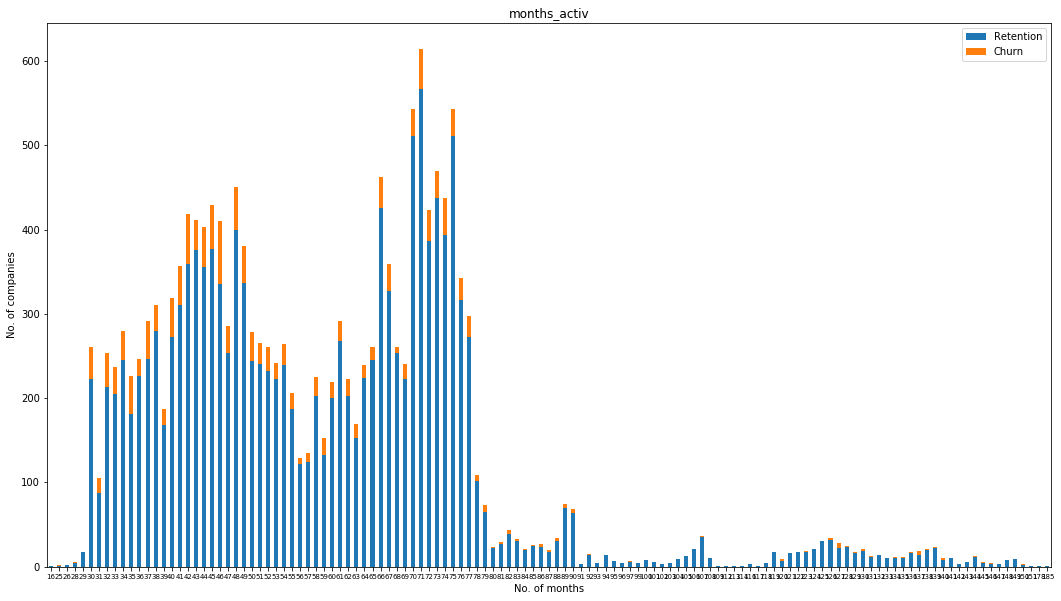

In [68]:
plot_churn_by_month(train_data, "months_activ", 7)

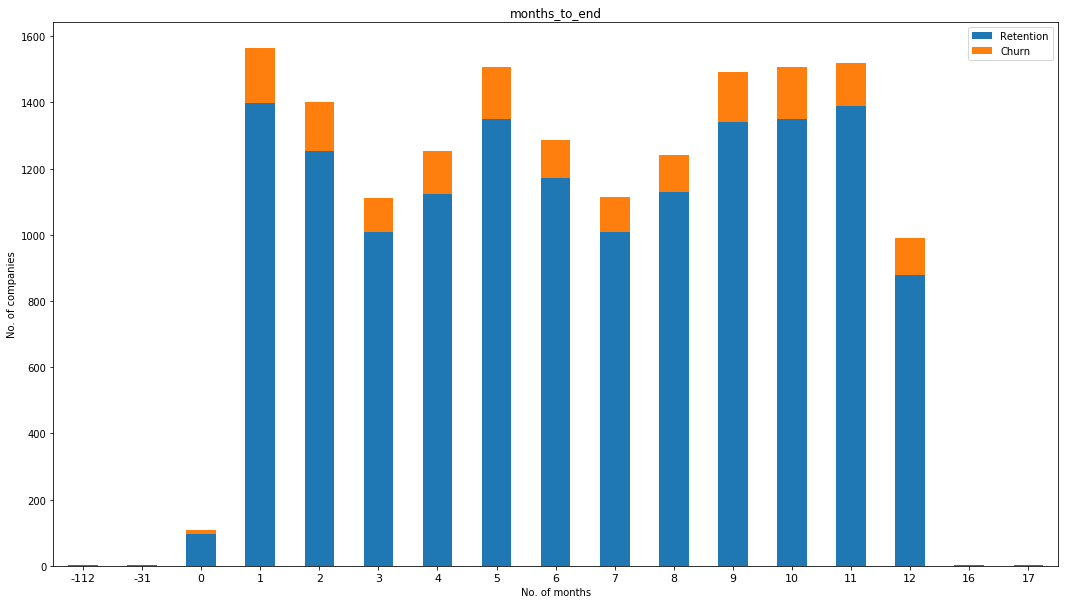

In [69]:
plot_churn_by_month(train_data, "months_to_end")

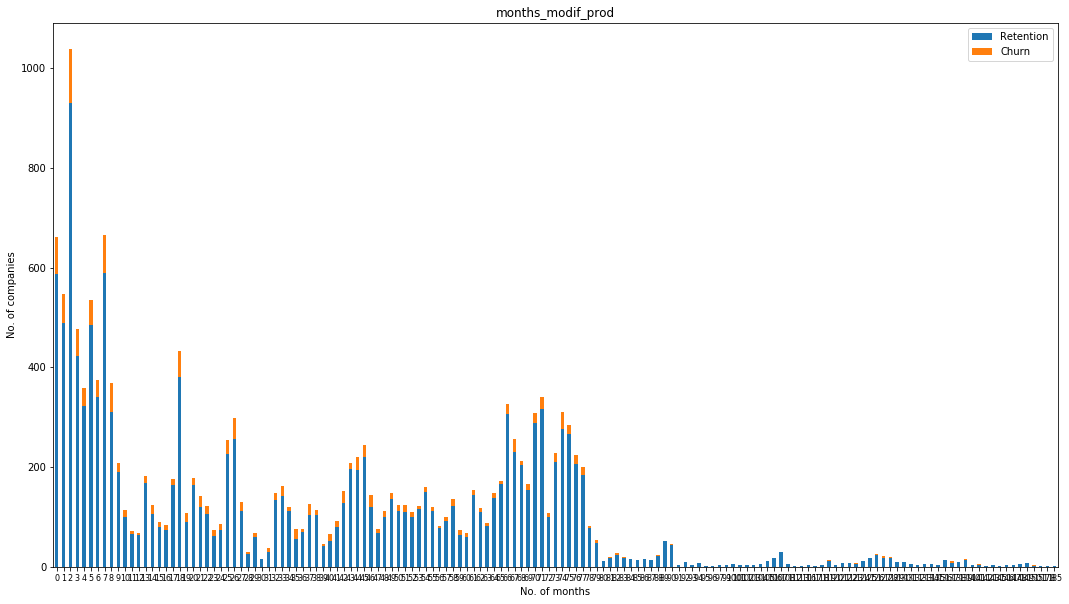

In [70]:
plot_churn_by_month(train_data, "months_modif_prod", 8)

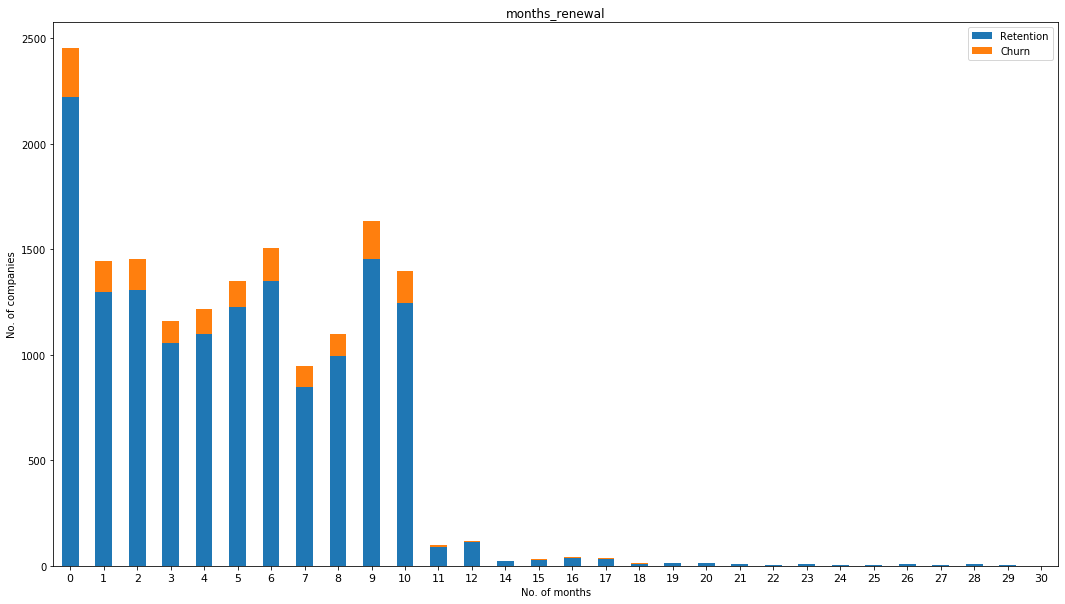

In [71]:
plot_churn_by_month(train_data, "months_renewal")

Remove the date columns

In [72]:
train_data.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

### Transforming boolean data

For the column has_gas, we will replace t for True or 1 and f for False or 0. This process is usually referred as onehot encoding

In [73]:
train_data["has_gas"]=train_data["has_gas"].replace(["t", "f"],[1,0])

### Categorical data and dummy variables

When training our model we cannot use string data as such, so we will need to encode it into numerical data. The easiest method is mappingeach category to an integer (label encoding) but this will not work because the model will misunderstand the data to be in some kind of order orhierarchy, 0 < 1 < 2 < 3 ...

For that reason we will use a method with dummy variables or onehot encoder

#### Categorical data channel_sales

Convert to dummy variable:

1. Replace NAN with a string called null_values_channel

In [75]:
train_data["channel_sales"] =train_data["channel_sales"].fillna("null_values_channel")

2. transform the channel_sales column into categorical data type

In [76]:
# Transform to categorical data type
train_data["channel_sales"] =train_data["channel_sales"].astype("category")

In [77]:
# number of categories
pd.DataFrame({"Samples in category": train_data["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [78]:
# Create dummy variables
categories_channel=pd.get_dummies(train_data["channel_sales"], prefix="channel")

In [80]:
# Rename columns for simplicity
categories_channel.columns= [col_name[:11] for col_name in categories_channel.columns]

In [81]:
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


To avoid multicollinearity, remove one of the columns

In [82]:
categories_channel.drop(columns=["channel_nul"],inplace=True)

#### Categorical data origin_up

1. Replace NAN with string: null_values_origin

In [83]:
train_data["origin_up"] =train_data["origin_up"].fillna("null_values_origin")

2. transform the origin_up column into categorical data type

In [84]:
train_data["origin_up"] =train_data["origin_up"].astype("category")

In [85]:
pd.DataFrame({"Samples in category": train_data["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [87]:
# Create dummy variables
categories_origin=pd.get_dummies(train_data["origin_up"], prefix="origin")
# Rename columns for simplicity, first 10 characters
categories_origin.columns= [col_name[:10] for col_name in categories_origin.columns]

In [90]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [91]:
# remove one col
categories_origin.drop(columns=["origin_nul"],inplace=True)

#### Categorical - activity_new

In [92]:
train_data["activity_new"] =train_data["activity_new"].fillna("null_values_activity")

In [94]:
categories_activity=pd.DataFrame({"Activity samples":train_data["activity_new"].value_counts()})
categories_activity

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
ckfxocssowaeipxueikxcmaxdmcduxsa,189
cwofmuicebbcmiaaxufmfimpowpacobu,122
cluecxlameloamldmasudocsbmaoamdw,119
wxemiwkumpibllwklfbcooafckufkdlm,119
sfisfxfcocfpcmckuekokxuseixdaoeu,83


There are amny categories with very few number of samples. So replace any category with less than 75 samples as null_values_category

In [95]:
# Get the categories with less than 75 samples
to_replace=list(categories_activity[categories_activity["Activity samples"] <=75].index)
# Replace them with `null_values_categories`
train_data["activity_new"]=train_data["activity_new"].replace(to_replace,"null_values_activity")

In [97]:
# Create dummy variables
categories_activity=pd.get_dummies(train_data["activity_new"], prefix="activity")
# Rename columns for simplicity
categories_activity.columns= [col_name[:12] for col_name in categories_activity.columns]

In [98]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [99]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

#### Merge dummy variables to main dataframe

merge new categories and remove old columns

In [100]:
# Use common index to merge
train_data=pd.merge(train_data, categories_channel, left_index=True, right_index=True)
train_data=pd.merge(train_data, categories_origin, left_index=True, right_index=True)
train_data=pd.merge(train_data, categories_activity, left_index=True, right_index=True)

In [101]:
train_data.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

### Log-transformation

For variables that are skewed, we need transformation.

Because some predective models make fundamental assumptions related to variables being "normally distributed". Hence, the model will perform poorly if the data is highly skewed.

Methods to reduce skewness: square root, cube root, and log.

log transformation is usually recommended for right skewed data.



In [102]:
train_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Some variables have for high standard deviation.

2. Log transformation does not work with negative data, so we will convert the negative values to NaN.

3. we cannot apply a log transformation to 0 valued entries, so we will add a constant 1.

In [103]:
# Remove negative values
train_data.loc[train_data.cons_12m<0,"cons_12m"] =np.nan
train_data.loc[train_data.cons_gas_12m<0,"cons_gas_12m"] =np.nan
train_data.loc[train_data.cons_last_month<0,"cons_last_month"] =np.nan
train_data.loc[train_data.forecast_cons_12m<0,"forecast_cons_12m"] =np.nan
train_data.loc[train_data.forecast_cons_year<0,"forecast_cons_year"] =np.nan
train_data.loc[train_data.forecast_meter_rent_12m<0,"forecast_meter_rent_12m"] =np.nan
train_data.loc[train_data.imp_cons<0,"imp_cons"] =np.nan

In [104]:
# Apply log10 transformation
train_data["cons_12m"] =np.log10(train_data["cons_12m"]+1)
train_data["cons_gas_12m"] =np.log10(train_data["cons_gas_12m"]+1)
train_data["cons_last_month"] =np.log10(train_data["cons_last_month"]+1)
train_data["forecast_cons_12m"] =np.log10(train_data["forecast_cons_12m"]+1)
train_data["forecast_cons_year"] =np.log10(train_data["forecast_cons_year"]+1)
train_data["forecast_meter_rent_12m"] =np.log10(train_data["forecast_meter_rent_12m"]+1)
train_data["imp_cons"] =np.log10(train_data["imp_cons"]+1)

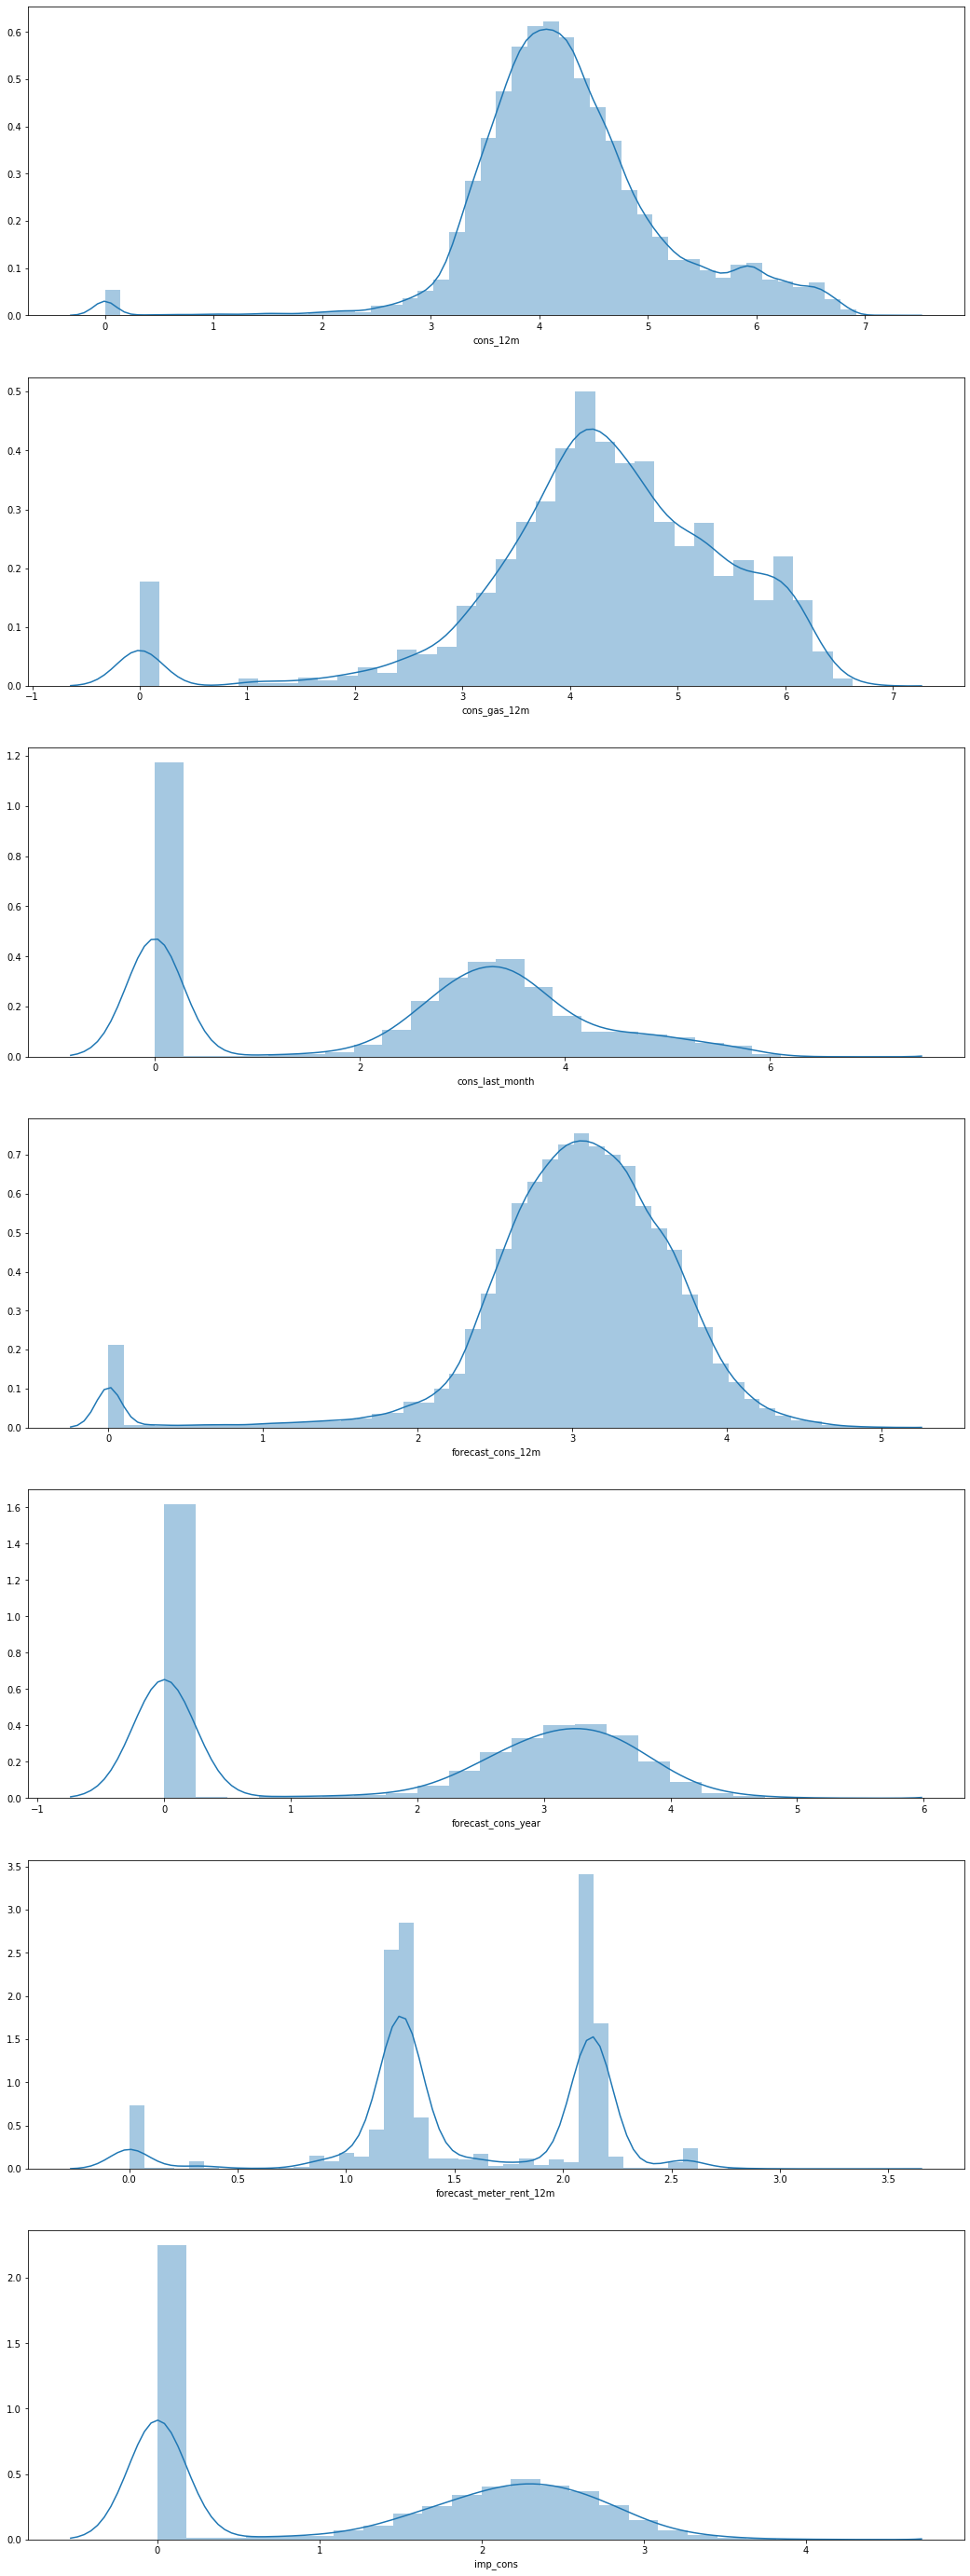

In [106]:
fig, axs=plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train_data["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train_data[train_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train_data["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

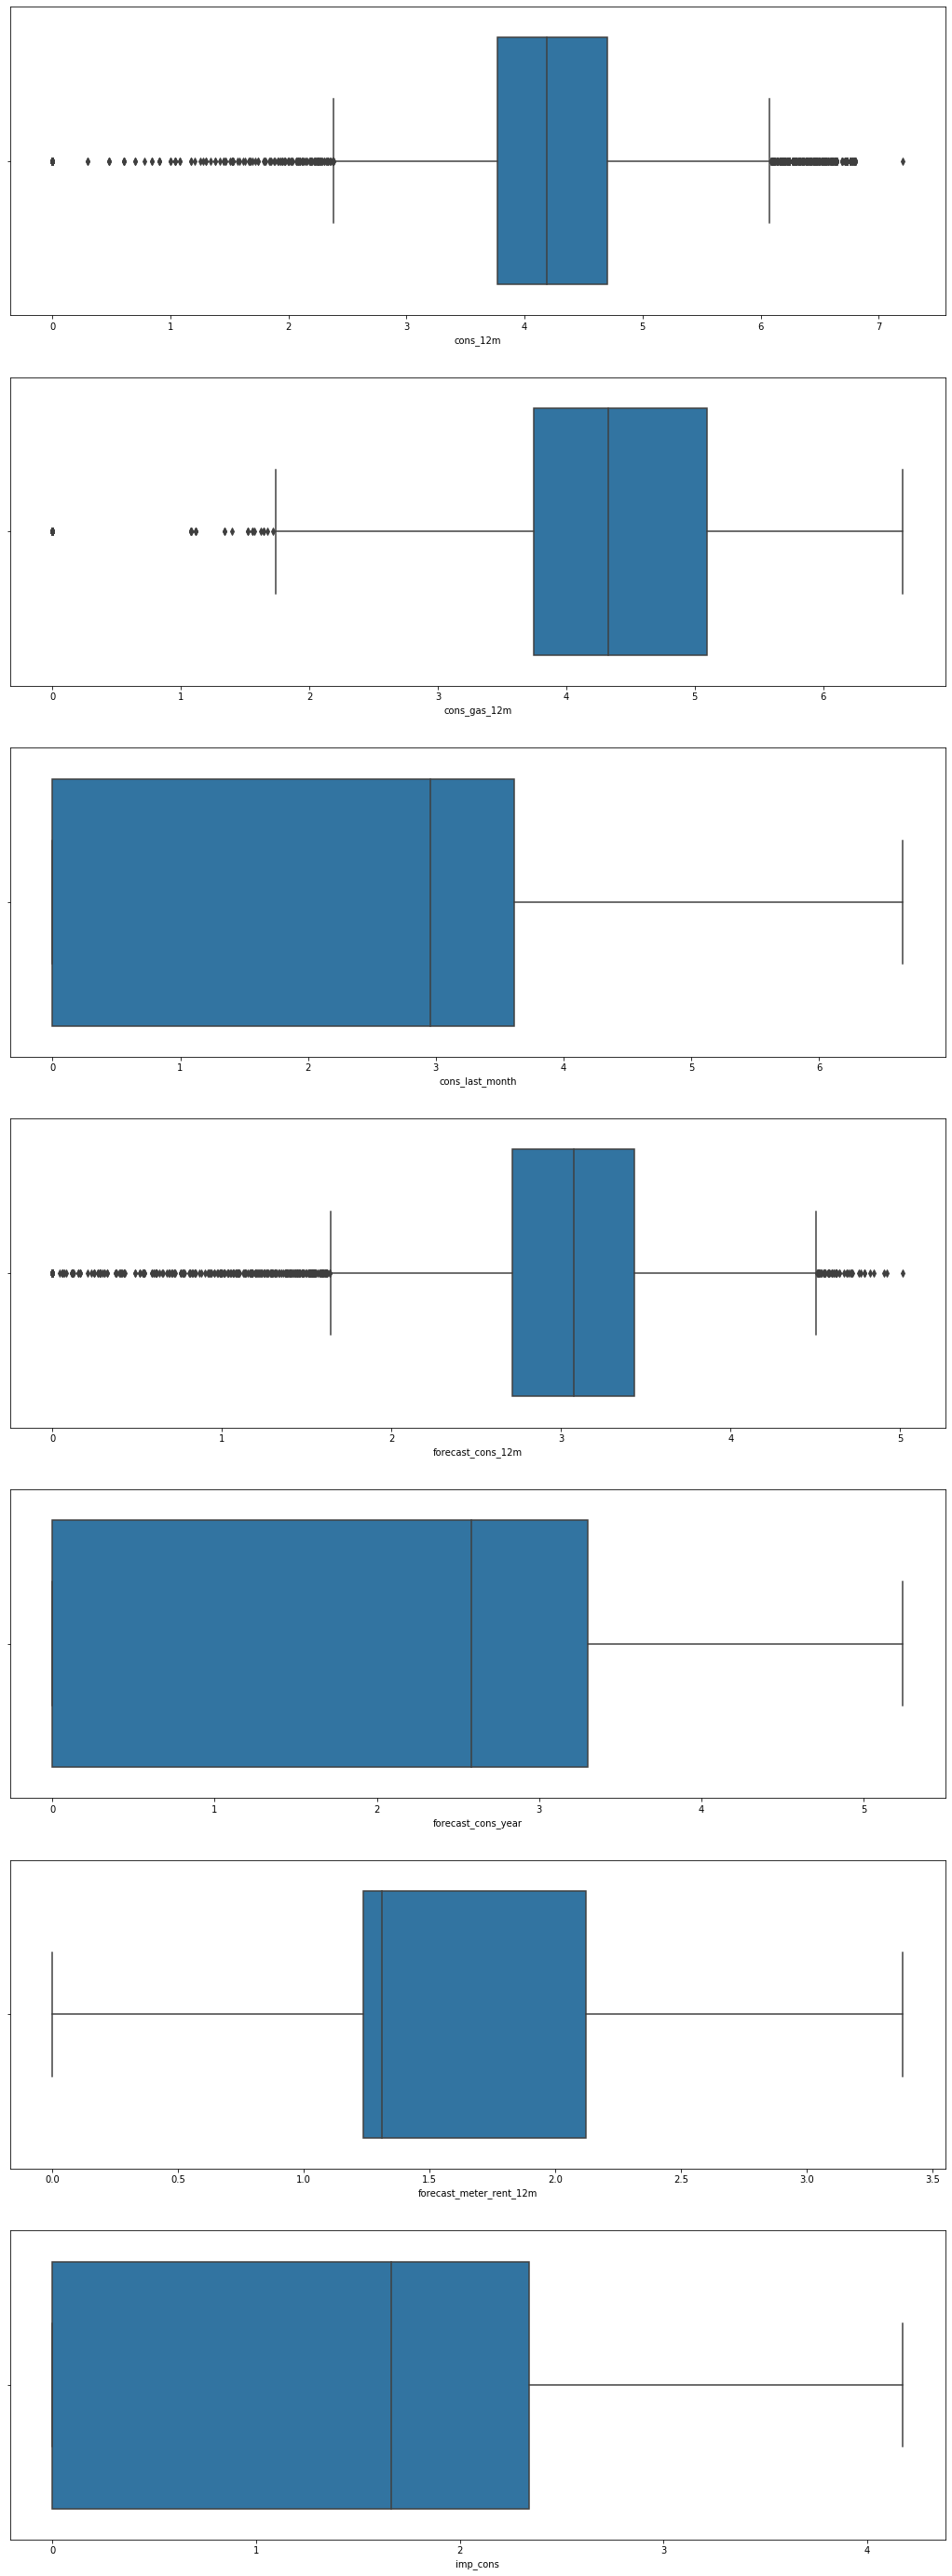

In [108]:
fig, axs=plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train_data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train_data[train_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train_data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [109]:
train_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Distribution looks more normal from the plot
2. standard deviation changed
3. still some outliers from box plot

## 2. High correlation variables

In [110]:
# Calculate correlation of variables
correlation=features.corr()

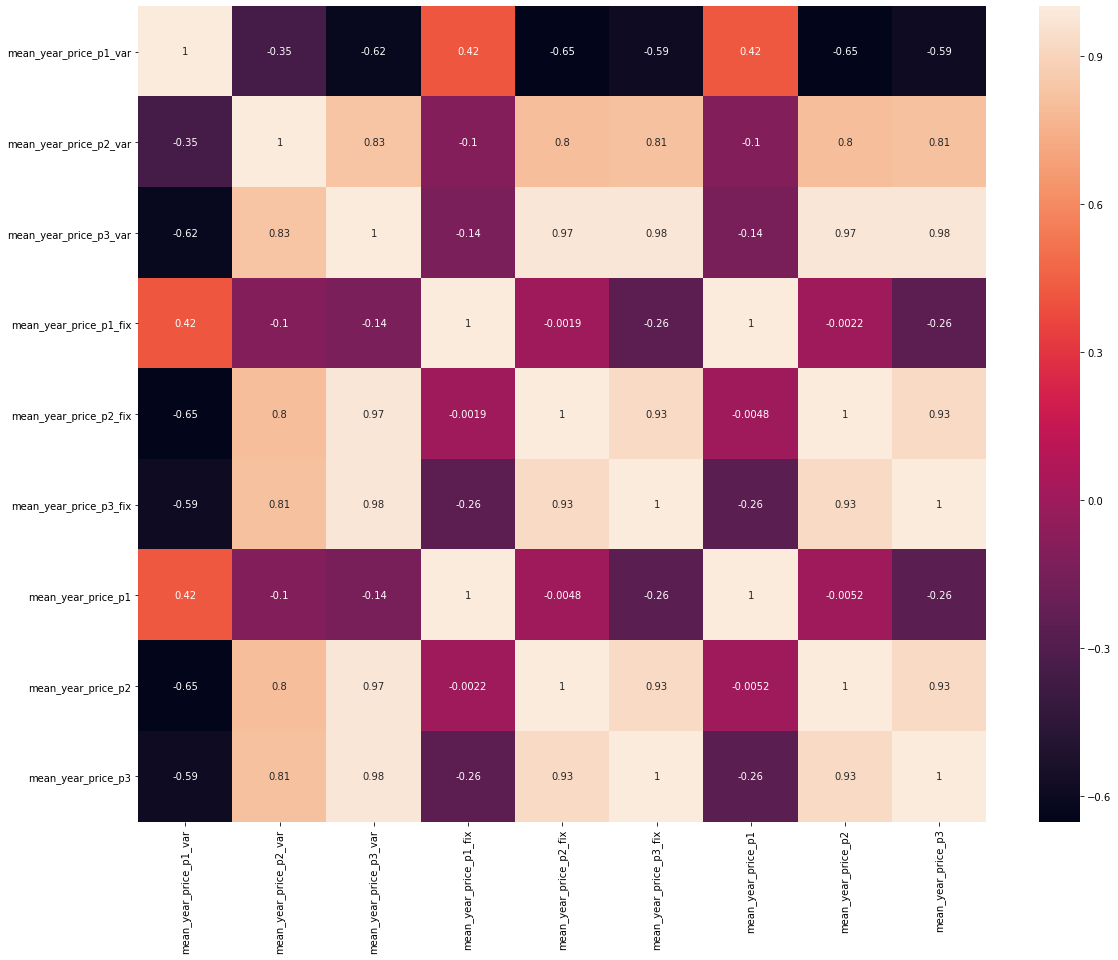

In [111]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree ofaccuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity bynature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regressionor Linear Regression are not immune to that problem and should be fixed before training the model.

In [112]:
# Calculate correlation of variables
correlation=train_data.corr()

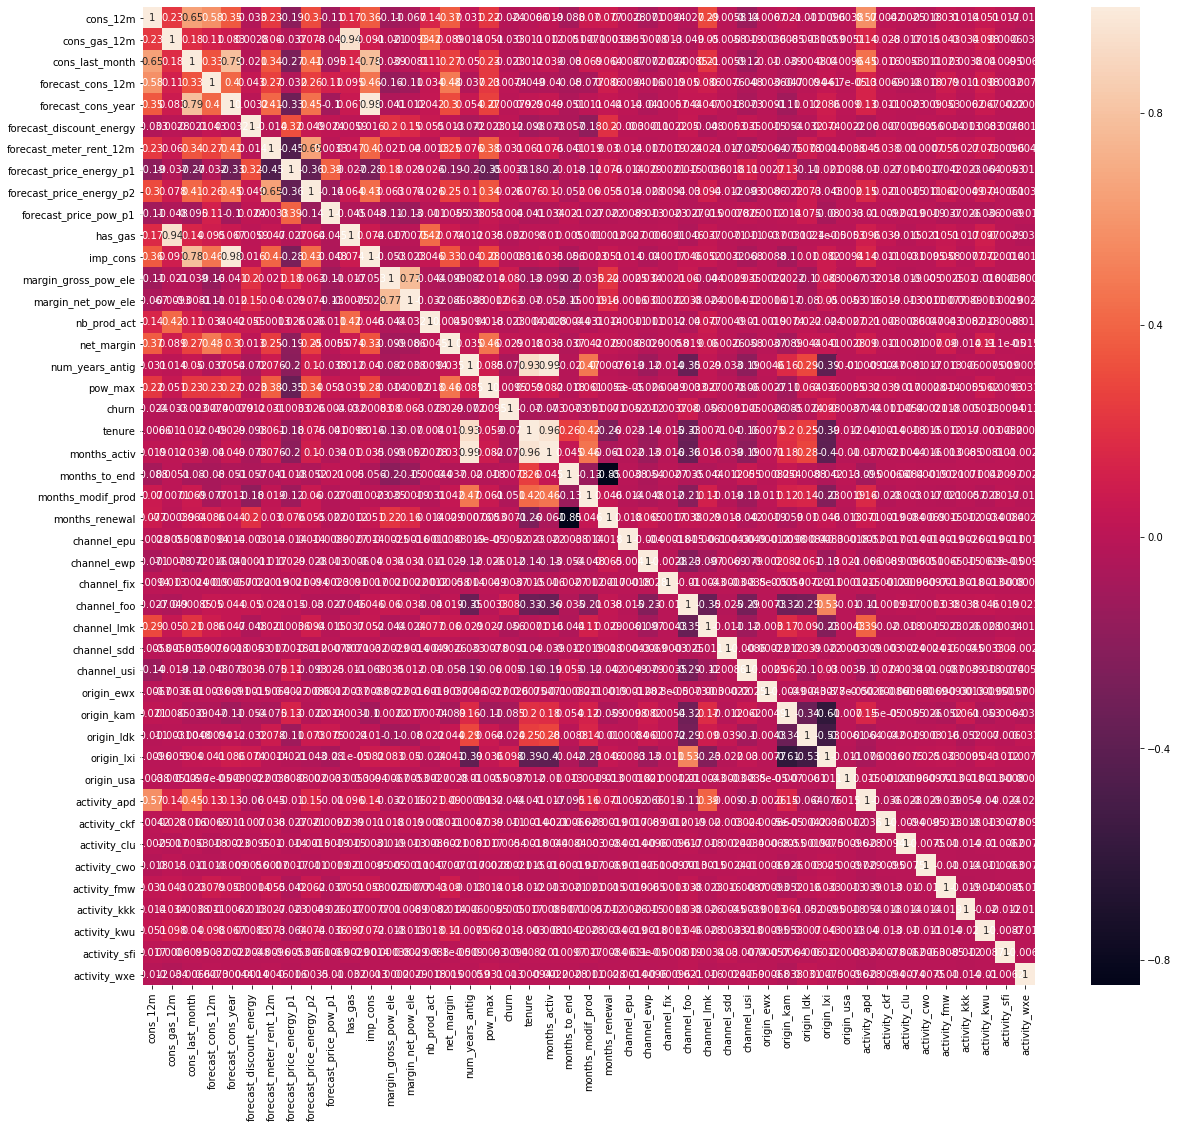

In [114]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

num_years_antig has a high correlation with months_activ (it provides us the same information).

In [115]:
train_data.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

## 3. Removing outliers

As identified during the exploratory phase, the consumption data has several outliers. We are going to remove those outliers

#### Criteria for identifying outliers

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations


#### Handling outliers

1. Removing them (works well for massive datasets)
2. Replacing them with sensible data (for not so big dataset)

Here we replace outliers with mean (average of the values excluding outliers).

In [118]:
def _find_outliers_iqr(dataframe, column):
    """    
    Find outliers using the 1.5*IQR rule.
    
    Parameters    
    ----------
    dataframe : pandas dataframe        
        Contains the data where the outliers are to be found    
    column : str        
        Usually a string with the name of the column     
        
    Returns    
    -------    
    Dict        
        With the values of the iqr, lower_bound and upper_bound    
    """
    col=sorted(dataframe[column])
    q1, q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr) 
    upper_bound=q3+(1.5*iqr)
    
    results= {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results

In [119]:
def remove_outliers_iqr(dataframe, column):
    """    
    Remove outliers using the 1.5*IQR rule.    
    
    Parameters    
    ----------    
    dataframe : pandas dataframe        
        Contains the data where the outliers are to be found    
    column : str        
        Usually a string with the name of the column  
        
    Returns   
    -------    
    Dataframe        
        With outliers under the lower and above the upper bound removed    
    """
    
    outliers=_find_outliers_iqr(dataframe, column)
    removed=dataframe[(dataframe[column] <outliers["lower_bound"]) |
                      (dataframe[column] >outliers["upper_bound"])].shape
    
    dataframe=dataframe[(dataframe[column] >outliers["lower_bound"]) &
                        (dataframe[column] <outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe

In [120]:
def remove_outliers_z_score(dataframe, column, Z=3):
    """    
    Remove outliers using the Z score. Values with more than 3 are removed.
    
    Parameters    
    ----------
    dataframe : pandas dataframe        
        Contains the data where the outliers are to be found    
    column : str        
        Usually a string with the name of the column     
    
    Returns    
    -------    
    Dataframe        
        With outliers under the lower and above the upper bound removed    
    """
    from scipy.stats import zscore
    
    dataframe["zscore"] =zscore(dataframe[column])
    removed=dataframe[(dataframe["zscore"] <-Z) |
                      (dataframe["zscore"] >Z)].shape
    
    dataframe=dataframe[(dataframe["zscore"] >-Z) &
                        (dataframe["zscore"] <Z)]
    print("Removed:", removed[0], " outliers of ", column)
    return dataframe.drop(columns="zscore")

In [121]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """    
    Replace outliers with the mean values using the Z score.    
    Nan values are also replaced with the mean values.    
    
    Parameters    ----------    
    dataframe : pandas dataframe        
        Contains the data where the outliers are to be found    
    column : str        
        Usually a string with the name of the column     
        
    Returns    -------    
    Dataframe
        With outliers under the lower and above the upper bound removed    
        """
    from scipy.stats import zscore
    
    df=dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    # Calculate mean without outliers
    df["zscore"] =zscore(df[column])
    mean_=df[(df["zscore"] >-Z) & (df["zscore"] <Z)][column].mean()
    
    # Replace with mean values
    
    dataframe[column] =dataframe[column].fillna(mean_)
    dataframe["zscore"] =zscore(dataframe[column])
    no_outliers=dataframe[(dataframe["zscore"] <-Z) | (dataframe["zscore"] >Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] <-Z) | (dataframe["zscore"] >Z),column] =mean_
    
    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [117]:
for c in features.columns:
    if c!="id":
        features=replace_outliers_z_score(features,c)

Replaced: 276  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 120  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [124]:
features.reset_index(drop=True, inplace=True)

In [125]:
train_data=replace_outliers_z_score(train_data,"cons_12m")
train_data=replace_outliers_z_score(train_data,"cons_gas_12m")
train_data=replace_outliers_z_score(train_data,"cons_last_month")
train_data=replace_outliers_z_score(train_data,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train_data=replace_outliers_z_score(train_data,"forecast_discount_energy")
tratrain_datain=replace_outliers_z_score(train_data,"forecast_meter_rent_12m")
train_data=replace_outliers_z_score(train_data,"forecast_price_energy_p1")
train_data=replace_outliers_z_score(train_data,"forecast_price_energy_p2")
train_data=replace_outliers_z_score(train_data,"forecast_price_pow_p1")
train_data=replace_outliers_z_score(train_data,"imp_cons")
train_data=replace_outliers_z_score(train_data,"margin_gross_pow_ele")
train_data=replace_outliers_z_score(train_data,"margin_net_pow_ele")
train_data=replace_outliers_z_score(train_data,"net_margin")
train_data=replace_outliers_z_score(train_data,"pow_max")
train_data=replace_outliers_z_score(train_data,"months_activ")
train_data=replace_outliers_z_score(train_data,"months_to_end")
train_data=replace_outliers_z_score(train_data,"months_modif_prod")
train_data=replace_outliers_z_score(train_data,"months_renewal")

Replaced: 174  outliers in  cons_12m
Replaced: 118  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 425  outliers in  forecast_cons_12m
Replaced: 575  outliers in  forecast_discount_energy
Replaced: 1  outliers in  forecast_meter_rent_12m
Replaced: 300  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 240  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  imp_cons
Replaced: 238  outliers in  margin_gross_pow_ele
Replaced: 220  outliers in  margin_net_pow_ele
Replaced: 185  outliers in  net_margin
Replaced: 293  outliers in  pow_max
Replaced: 462  outliers in  months_activ
Replaced: 2  outliers in  months_to_end
Replaced: 156  outliers in  months_modif_prod
Replaced: 133  outliers in  months_renewal


In [126]:
train_data.reset_index(drop=True, inplace=True)

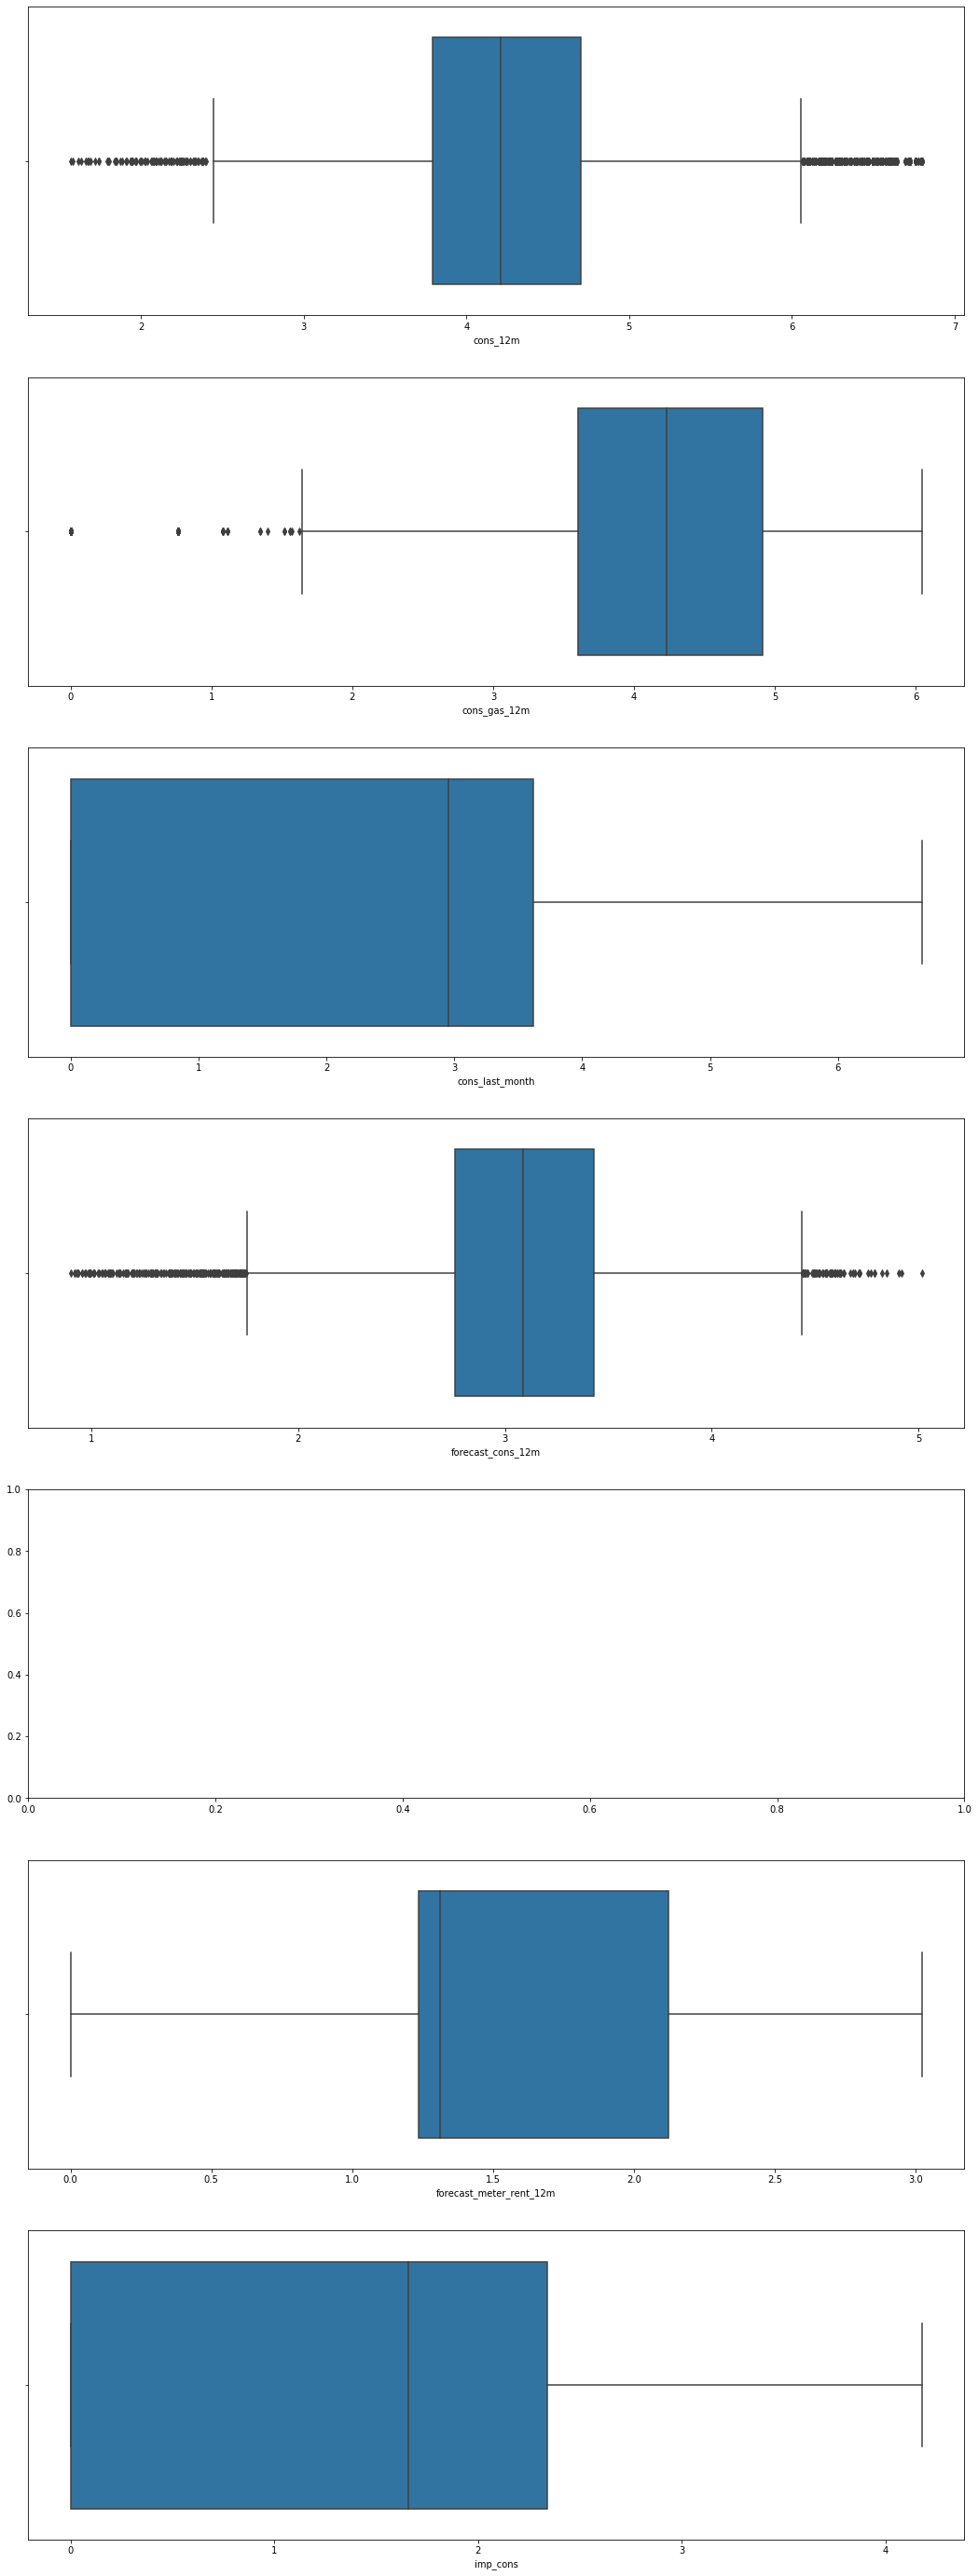

In [129]:
fig, axs=plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train_data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train_data[train_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train_data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train_data["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

## 4. Pickling

In [130]:
PICKLE_TRAIN_DIR=os.path.join("..", "processed_data", "train_data2.pkl")
PICKLE_HISTORY_DIR=os.path.join("..", "processed_data", "history_data2.pkl")

In [131]:
pd.to_pickle(train_data, PICKLE_TRAIN_DIR)
pd.to_pickle(history_data, PICKLE_HISTORY_DIR)